In [11]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [12]:
## object orientation allows you to look at lots of data files in parallel to eachother 

In [108]:
class patch_analysis: 

    def __init__(self, path):
        self.path = path
        self.load_data(path)
        self.edit_data()
        #self.save_name()
        

#load in new file(s)
    def load_data(self, path):
        path = self.path
        data = loadmat(path)
        self.data = data
        print("total sweeps: " + str(len(data)))
        return data


#save file name as the file date and cell number
    def save_name(self):
        path = self.path 
        filename = os.path.basename(path)  # This will get '20221017_005.mat'
        variable_name = os.path.splitext(filename)[0]  #remove the extension, giving you file name/date ex: '20221017_005' 

        self.variable_name = variable_name
        print(variable_name)
        # Now you can use variable_name in your code
        return variable_name


#get rid of ititial keys 
    def edit_data(self):
        # data = self.load_data()
        #give access to variable names inside functions 
        data = self.data
        
        new_data = data.copy()  # Create a copy of the original dictionary

        for i in range(4):  # Remove the first three keys from the copy
            first_sweep_key = list(new_data.keys())[0]
            new_data.pop(first_sweep_key)

        for i in range(len(new_data.keys())):  
            first_sweep_key = list(new_data.keys())[i]
            first_value = new_data[first_sweep_key]

        self.new_data = new_data
        print('done1')
        return new_data 
        
    #plot all sweeps to look at the data, or just select sweeps at specific time points
    def plot_sweeps(self, start_time, end_time, initial_sweep, final_sweep): 
        
        new_data = self.new_data
        plt.figure(figsize=(10, 6))

        # Plot pA data over time for each trial
        for trial_name, pA in list(new_data.items())[initial_sweep:final_sweep]:
            pA = np.array(pA).flatten()  # flatten the array becuase it is 2D
            times = np.linspace(0, len(pA)/10, len(pA))  # create a time array
            plt.plot(times, pA * 1e12)  # multiplying by 1e12 to convert the unit from A to pA
            #break  # Break the loop after the first iteration
            
        #look only at specific time points for your base amp pre stim
        plt.ylim(-1000, 800) # adjust data range in pA
        plt.xlim(start_time, end_time) # adjust this according to your data range in pA


        plt.xlabel('Time (ms)')  # Add a label to the x-axis
        plt.ylabel('Picoamps (pA)')  # Add a label to the y-axis
        plt.title('Base amp')  # Add a title

        plt.grid(True)  
        return('done')
    
    
    #get baseline values for each sweep
    def calculate_baseline(self, baseline_window_start = 50, baseline_window_end = 100):
        baseline_values = []
        new_data = self.new_data
        count = 0
        for key, value in new_data.items():
            count += 1
            #need to average this before making a list of it
            #should be 90 values, each an average over this time period definted 
            baseline_values.append(value[0][baseline_window_start:baseline_window_end]*(10**12))

        self.baseline_values = baseline_values
        return baseline_values  
    

    def avg_baseline(self):
        self.calculate_baseline()
        baseline_values = self.baseline_values    
        avg_baseline_value = []
        for basline_window in baseline_values:
        
            baseline = sum(basline_window) / len(basline_window)
            avg_baseline_value.append(baseline)
            
        self.avg_baseline_value = avg_baseline_value
        return avg_baseline_value

    
    def calculate_first_window(self,peak_window_start = 100, peak_window_end = 150): 
        all_first_peaks = []
        new_data = self.new_data
        count = 0
        for key, value in new_data.items():
            count += 1
       
            all_first_peaks.append(value[0][peak_window_start:peak_window_end]*(10**12))
        self.all_first_peaks = all_first_peaks
        return all_first_peaks
  
    def avg_first_peak(self):
        calculate_first_window = self.calculate_first_window()
        #all_first_peaks = self.all_first_peaks()    

        avg_first_peak = []
        for first_peak in calculate_first_window:
        
            first_peak = sum(first_peak) / len(first_peak)
            avg_first_peak.append(first_peak)
            
        self.avg_first_peak = avg_first_peak
        return avg_first_peak


    # ## !! This one is not working yet
    # # calculate the actual response size 
    # def calculate_first_response(self):
    #     calculate_baseline = self.calculate_baseline()
    #     calculate_first_window = self.calculate_first_window()
    #     #self.first_peak()
    #     all_first_peaks = self.all_first_peaks()

    #     for first_response_pA in all_first_peaks:
    #         print(first_response_pA)


    def time_correlates(self):
        new_data = self.new_data

        count = 0
        times = []
        for time in new_data:

            times.append(count)
            count += 0.333
        
        self.times = times
        return times

    def peak_df(self):
        # variable_name = self.variable_name
        avg_baseline = self.avg_baseline
        times = self.time_correlates()
        first_peak_list = self.calculate_first_response()
        # times = self.times
        # first_peak_list = self.first_peak_list
    
        # df = pd.DataFrame(
        #     {'first_peak': first_peak_list,
        #      'avg_baseline': avg_baseline,
        #     'time': times}
        #      )

        # df.to_csv('/Users/joyadler/Desktop/patch_df/' + variable_name + ".csv" )
        



In [109]:
path = '/Volumes/JOY_DRIVE/100522_003.mat'
patch = load_patch(path) #instance of a class

total sweeps: 99
done1


In [113]:
patch.calculate_first_window()

[array([ 92.220625,  95.296875,  93.691875,  97.905   ,  87.74    ,
        101.583125,  87.87375 ,  88.475625,  95.564375,  99.10875 ,
         98.7075  , 103.054375,  93.424375, 100.17875 ,  95.163125,
         96.500625, 108.20375 ,  95.89875 ,  95.698125,  89.6125  ,
        107.468125,  97.838125,  97.37    ,  97.704375, 103.054375,
         99.91125 , 104.124375,  98.640625, 107.535   ,  95.63125 ,
        109.073125, 102.05125 , 105.52875 ,  93.625   , 106.59875 ,
        104.0575  , 104.5925  ,  99.576875, 108.07    , 109.14    ,
        101.315625,  95.4975  , 112.149375,  99.91125 ,  99.443125,
        102.920625,  90.6825  ,  96.3     , 103.79    , 107.066875]),
 array([ 80.851875,  72.559375,  84.596875,  85.19875 ,  81.32    ,
         83.32625 ,  82.323125,  84.730625,  79.18    ,  70.085   ,
         81.32    ,  80.316875,  87.673125,  85.73375 ,  84.39625 ,
         87.138125,  83.259375,  85.065   ,  88.341875,  82.323125,
         92.488125,  91.485   ,  82.39    ,  9

In [111]:
patch.calculate_first_peak()

AttributeError: 'load_patch' object has no attribute 'calculate_first_peak'

In [70]:
patch.peak_df()

AttributeError: 'load_patch' object has no attribute 'first_peak'

In [69]:
patch.avg_baseline()

[13.5823125,
 0.13909999999998773,
 1.1796750000000054,
 -5.683037499999988,
 -7.060662500000002,
 -9.15652499999999,
 -16.234574999999996,
 -22.046012499999996,
 -28.278762500000013,
 -21.873475000000006,
 -29.453087500000006,
 -29.943949999999983,
 -30.103112499999984,
 -37.84322500000003,
 -33.26228749999999,
 -40.0995875,
 -35.933275000000016,
 -41.053225000000005,
 -46.0889125,
 -43.34703750000001,
 -36.29707500000001,
 -35.1561875,
 -45.939112499999986,
 -51.89500000000002,
 -45.368,
 -40.91278749999999,
 -56.03590000000001,
 -55.97705,
 -63.14872500000004,
 -58.78312500000001,
 -60.842874999999985,
 -49.18255,
 -58.15851250000001,
 -64.256175,
 -57.234299999999976,
 -55.89011250000001,
 -64.52635000000002,
 -53.526750000000014,
 -62.479975000000024,
 -62.22183749999997,
 -64.95033750000002,
 -59.401050000000005,
 -64.63067500000001,
 -58.83528749999999,
 -58.571799999999996,
 -58.919550000000015,
 -55.64401250000002,
 -64.74168749999998,
 -58.364487499999996,
 -59.98954999999998

In [54]:
# # to add in more data at the same time 
# path = '/Users/joyadler/Desktop/FordLab/RawData/20221017_001.mat'
# patch2 = load_patch(path) #instance of a class

In [55]:
patch.calculate_baseline()

[array([-645.34375 , -251.45    , -168.056875, -122.64875 , -112.416875,
         -75.368125,  -61.7925  ,  -49.019375,  -33.103125,  -27.218125,
         -28.421875,   -7.155625,   -1.939375,   13.709375,   11.90375 ,
           9.63    ,   21.466875,   22.536875,   29.6925  ,   36.38    ,
          44.405   ,   42.465625,   51.694375,   44.1375  ,   50.356875,
          50.29    ,   64.801875,   64.06625 ,   55.23875 ,   67.209375,
          70.62    ,   73.83    ,   63.598125,   73.83    ,   67.41    ,
          74.365   ,   76.304375,   75.1675  ,   80.38375 ,   81.5875  ,
          75.501875,   78.043125,   88.81    ,   76.170625,   87.74    ,
          86.26875 ,   83.05875 ,   86.201875,   88.743125,   95.430625]),
 array([-651.295625, -259.60875 , -183.839375, -142.31    , -117.499375,
         -99.710625,  -69.349375,  -60.923125,  -52.29625 ,  -35.778125,
         -30.829375,  -25.01125 ,  -14.645625,   -7.958125,   -3.009375,
          11.77    ,    3.410625,    7.62375 ,   

In [10]:
patch.peak_df()

AttributeError: 'load_patch' object has no attribute 'variable_name'

In [538]:
a = patch.first_peak()
b = patch2.first_peak()
print(len(a))
print(b)


90
[-121.31124999999997, -83.46, -97.303125, -105.06062499999999, -99.10874999999999, -119.90687499999999, -127.46375, -123.65187499999999, -132.67999999999998, -119.70624999999998, -128.333125, -143.045625, -138.631875, -138.76562499999997, -133.28187499999999, -141.841875, -138.69875, -147.459375, -145.051875, -146.38937499999997, -138.56499999999997, -144.38312499999998, -138.69875, -153.34437499999999, -148.73, -156.48749999999998, -154.94937499999997, -145.31937499999998, -158.35999999999999, -120.91, -136.22437499999998, -128.53374999999997, -136.42499999999998, -124.78874999999998, -121.24437499999999, -126.39375, -133.74999999999997, -134.55249999999998, -131.60999999999999, -121.31124999999997, -122.71562499999999, -117.69999999999999, -119.43875, -143.58062499999997, -144.45, -122.71562499999999, -132.4125, -127.99874999999999, -126.99562499999998, -126.79499999999997, -131.275625, -121.91312499999998, -120.84312499999999, -112.35, -118.43562499999999, -134.55249999999998, -1

In [529]:
patch.first_peak(1)


TypeError: 'numpy.float64' object is not callable

In [498]:

first_peak_values = patch.first_peak()
print(len(first_peak_values))


TypeError: 'numpy.float64' object is not callable

In [333]:
peaks = patch.calculate_first_window()

In [334]:
peaks[2]

array([-146.8575  , -149.331875, -150.535625, -143.580625, -137.09375 ,
       -149.064375, -144.1825  , -151.204375, -146.523125, -155.685   ,
       -131.810625, -143.1125  , -138.16375 , -147.593125, -140.504375,
       -145.453125, -139.76875 , -141.775   , -133.75    , -133.75    ,
       -138.96625 , -128.466875, -130.005   , -128.4     , -133.08125 ,
       -128.6675  , -120.50875 , -132.211875, -132.746875, -126.92875 ,
       -132.145   , -126.460625, -124.855625, -124.320625, -134.5525  ,
       -120.575625, -121.98    , -127.19625 , -124.855625, -123.18375 ,
       -120.174375, -126.66125 , -121.244375, -125.19    , -131.74375 ,
       -126.26    , -110.276875, -121.57875 , -115.894375, -113.486875])

'done'

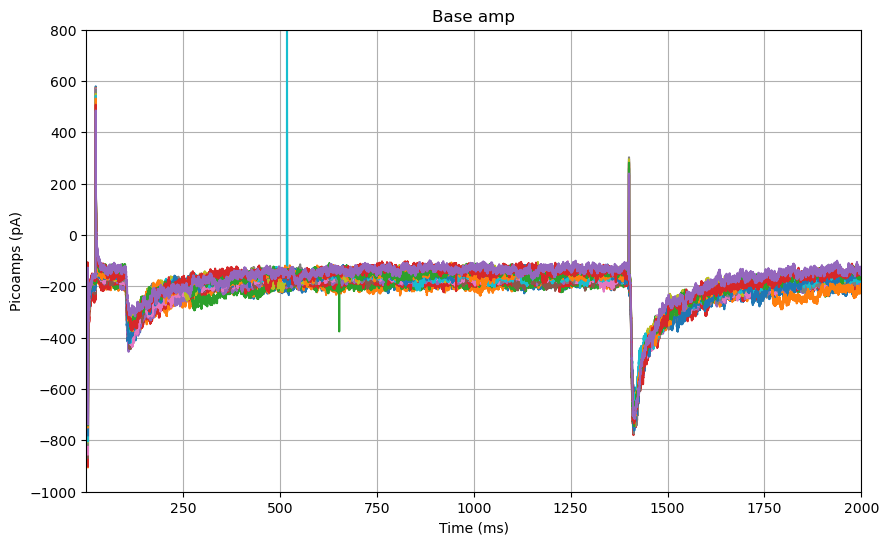

In [348]:
patch.plot_sweeps(1,2000, 10, 25)

In [271]:
path = '/Users/joyadler/Desktop/20221017_001.mat'
patch1 = load_patch(path) #instance of a class

total sweeps: 79
done1


'done'

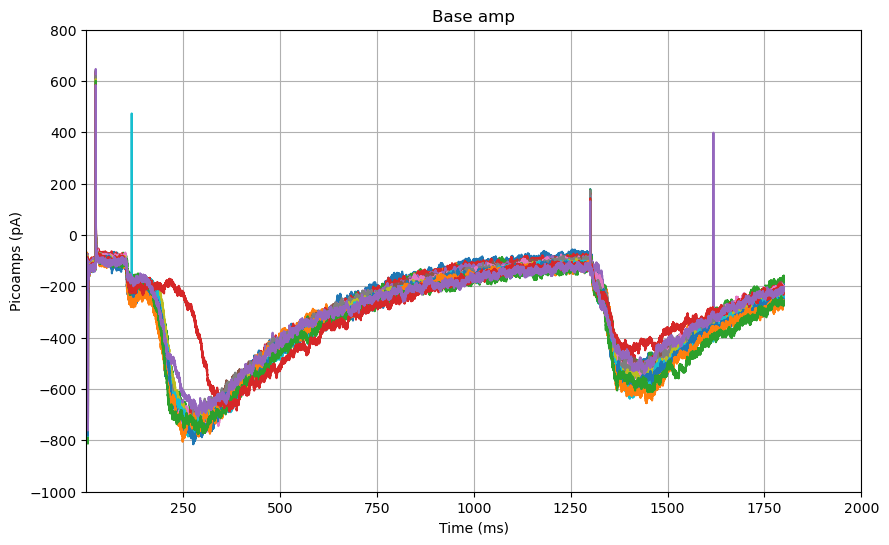

In [103]:
patch1.plot_sweeps(1,2000, 10, 25)

In [500]:
patch.save_name(new_data)

NameError: name 'new_data' is not defined